In [63]:
import numpy as np
from math import sqrt, log
import matplotlib.pyplot as plt
%matplotlib inline

class SteadyStateAg(object):
    
    def __init__(self,
                 annual_bedload_discharge = 12.,
                 channel_length = 400.,
                 sea_level_change = 10.,
                 bankfull_discharge = 5000.,
                 floodplain_width = 8.,
                 grain_size = 0.25,
                 fraction_washload_deposition = 2.5,
                 Shields_number = 1.86,
                 coeff_Engelund = 0.05,
                 bed_porosity = 0.4,
                 flood_intermittence = 0.1,
                 coeff_Chezy = 25.,
                 channel_sinuosity = 1.5,
                 rho_w = 1000.,
                 rho_s = 2650.,
                 sea_level_elevation = 0.,
                 dt = 1000.,
                 total_time = 12000.)

self.annual_bedload_discharge = float(annual_bedload_discharge) # Mt/yr
self.channel_length = float(channel_length) # km
self.sea_level_change = float(sea_level_change) # mm/yr
self.bankfull_discharge = float(bankfull_discharge) # m3/s
self.floodplain_width = float(floodplain_width) # km
self.grain_size = float(grain_size) # mm
self.fraction_washload_deposition = float(fraction_washload_deposition)
self.Shields_number = float(Shields_number)
self.coeff_Engelund = float(coeff_Engelund)
self.porosity = float(porosity)
self.flood_intermittence = float(flood_intermittence)
self.channel_sinuosity = float(channel_sinuosity)
self.sea_level_elevation = float(sea_level_elevation)
self.dt = float(dt)
self.self.total_time = float(total_time)
self.coeff_Chezy = float(coeff_Chezy)

self.R = (float(rho_s) - float(rho_w)) / float(rho_w)



self.Cf = 1. / self.coeff_Chezy**2
self.Qt = self.annual_bedload_discharge * 1000000. / (31557600. * (self.R + 1.) * self.flood_intermittence)
C = Qt / (Qt + bankfull_discharge)
BMSS = (R + 1.) * Qt * 1000000. / (Qt + bankfull_discharge)
Su = R * sqrt(Cf) * Qt / (coeff_Engelund * Shields_number * bankfull_discharge)
beta = ((1. - porosity) * floodplain_width * 1000. * ((sea_level_change / 1000.) / 31557600.) *  1000. * channel_length 
        / (flood_intermittence * channel_sinuosity * Qt * (1. + fraction_washload_deposition)))

assert beta < 1, (
    "Adjust L such that the beta parameter is below 1. "
    "If beta is greater than 1, the sediment does not reach the delta.")

# set up initial bed
xhat = np.array(np.arange(0,1.05,0.05))
x = channel_length * xhat

# find initial values
Qtbf = Qt * (1 - beta * xhat)
Sl = Su * (1 - beta * xhat)
etahat = Su * ((1 - 0.5 * beta) - xhat + 0.5 * beta * xhat**2)
etadev = 1000. * channel_length * etahat
etadev[-1] = 0.
Bbf = (Cf / (coeff_Engelund * Shields_number**2.5 * sqrt(R))) * (Qtbf / (sqrt(9.81 * grain_size / 1000.) * (grain_size / 1000.)))
Hbf = coeff_Engelund * (Shields_number**2  / sqrt(Cf)) * bankfull_discharge * (grain_size / 1000.) / Qtbf

output = np.zeros((int(total_time/dt) + 1, len(x)))

# run
for i in range(int(total_time/dt) + 1):

        time = i*dt
        
        output[i] = sea_level_elevation + (sea_level_change / 1000.)*time + etadev

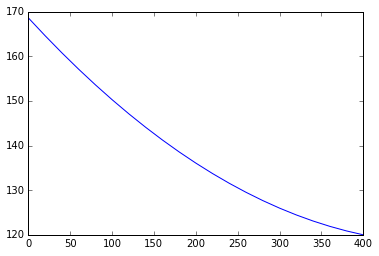

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x,output[-1])

In [67]:
output[-1]

array([ 168.5699228 ,  164.57880965,  160.75218251,  157.09004136,
        153.59238622,  150.25921708,  147.09053394,  144.08633679,
        141.24662565,  138.57140051,  136.06066137,  133.71440823,
        131.53264109,  129.51535995,  127.66256482,  125.97425568,
        124.45043254,  123.09109541,  121.89624427,  120.86587913,  120.        ])